## 1. PyTesseract

In [1]:
#!pip install pytesseract
#!pip install pillow

In [2]:
import pytesseract

In [3]:
from tqdm import tqdm

In [4]:
from PIL import Image

In [5]:
import os

In [6]:
#!pip install pdf2image

In [7]:
from pdf2image import convert_from_path

### 1.1 Without any language specification

In [8]:
type(Image.open('image.jpg'))

PIL.JpegImagePlugin.JpegImageFile

In [9]:
%%time
recognized = pytesseract.image_to_string(Image.open('image.jpg'))

CPU times: user 39.6 ms, sys: 11 ms, total: 50.6 ms
Wall time: 3.21 s


In [10]:
print(recognized)

Miiincher.

qemeine Avituug,

Die UNgemeine Jeltung toftet fiir Minden dur Trdgerin und
ig Dit, 1—, durd alle deutidven Pok-
anfialten monatli® Wt, 150, unter Streijoand in Deutidland und

Zeitungegeldafte monatl

Dererreldellngers Mt. 2—, ins Yusland M. 225,
er}

Die Haupterpedition,
expeditionen und %.

t, 27, alle Budhandlungen, Jeitungs-
joRtanftelten nefmen Gejtellungen entgegen,

€rjdheint einmal wodentlig.

Snferatenpretie:

Metlamegetle 1 Ke RUA i

Rabatt. Mindener Lolalanseigen culliegenderm ‘Tarif.

Sajerate nehmen entgegen die pexplerpen en Munchen, Mullere
Rrage 27/29, umd alle

ene Ronparelfleseile SO Pig.

q te en entipredenden

pa!
bei Weber

innoncen>Erpeditionen.

Telephon: Redattion, Expedition und Verlag Umt Widen 2621,

Nummer 45. |

Seite

firiegs-€hronih.

Der Feind im Wejten — Der Feind
im Often — Tiirtei — Stalien
— England — Ueber den Ton
in der Preffe . 2... SY 645
Der Orient in Flammen. Bon
Dr. Frhtn. v. Madan . . . . 650

Redattion und Expedition: Minden, Mi

#### Result: awful 👎👎👎

### 1.2 Setting language to 'German fraktur'

In [13]:
%%time
recognized = pytesseract.image_to_string(Image.open('image.jpg'), lang='frk')

CPU times: user 25.7 ms, sys: 7.41 ms, total: 33.1 ms
Wall time: 6.07 s


In [14]:
print(recognized)

München.

gemeine Zeitung

Die Allgemeine Zeitung koſtet für München dur<h Trägerin und
lic Mk. 1.=-, durc) alle deutſc&en Poſt-
anſtalten monatlich ML, 1.50, unter Streiſband in Deutſchland und

Zeituangsgeſchäfte monat!

Deſterreic-Ungarn Mk. 2.=-, ins Ausland M. 2.25.
er|

Die Hauptexpedition,
expeditionen und PV

rt, 27, alle Buchhandlungen, Zeitungs-
oſtanſtalten nehmen Beſtellungen entgegen.

Erſcheint einmal wöchentlich.

Inſeratenpreije:

Neklamezeile 1 M. EN 7 1

Rabatt. Münchener Lokalanzeigen aufliegendem Tarif.

Inſerate nehmen entgegen die Dauptezpehition München, Müller»
ſtraße 27/29, und alle

ene Nonpareillezeile 560 Pfg,

x? es en entſprechenden

pa!
bei Wieder!

innoncen-Expeditionen.

Telephon: Redaktion, Expedition und Verlag Amt München 23821,

Nummer 45. |

Seite

kiriegs-Chronih.

Der Feind im Weſten =- Der Feind
im Oſten -- Türkei -=- Italien
-=- England =- Ueber den Ton
inder: Preſſe." 2 05.5512 "294.045
Der Orient in Flammen. Von
Dr. Frhrn. v. Mackay . =. . . 

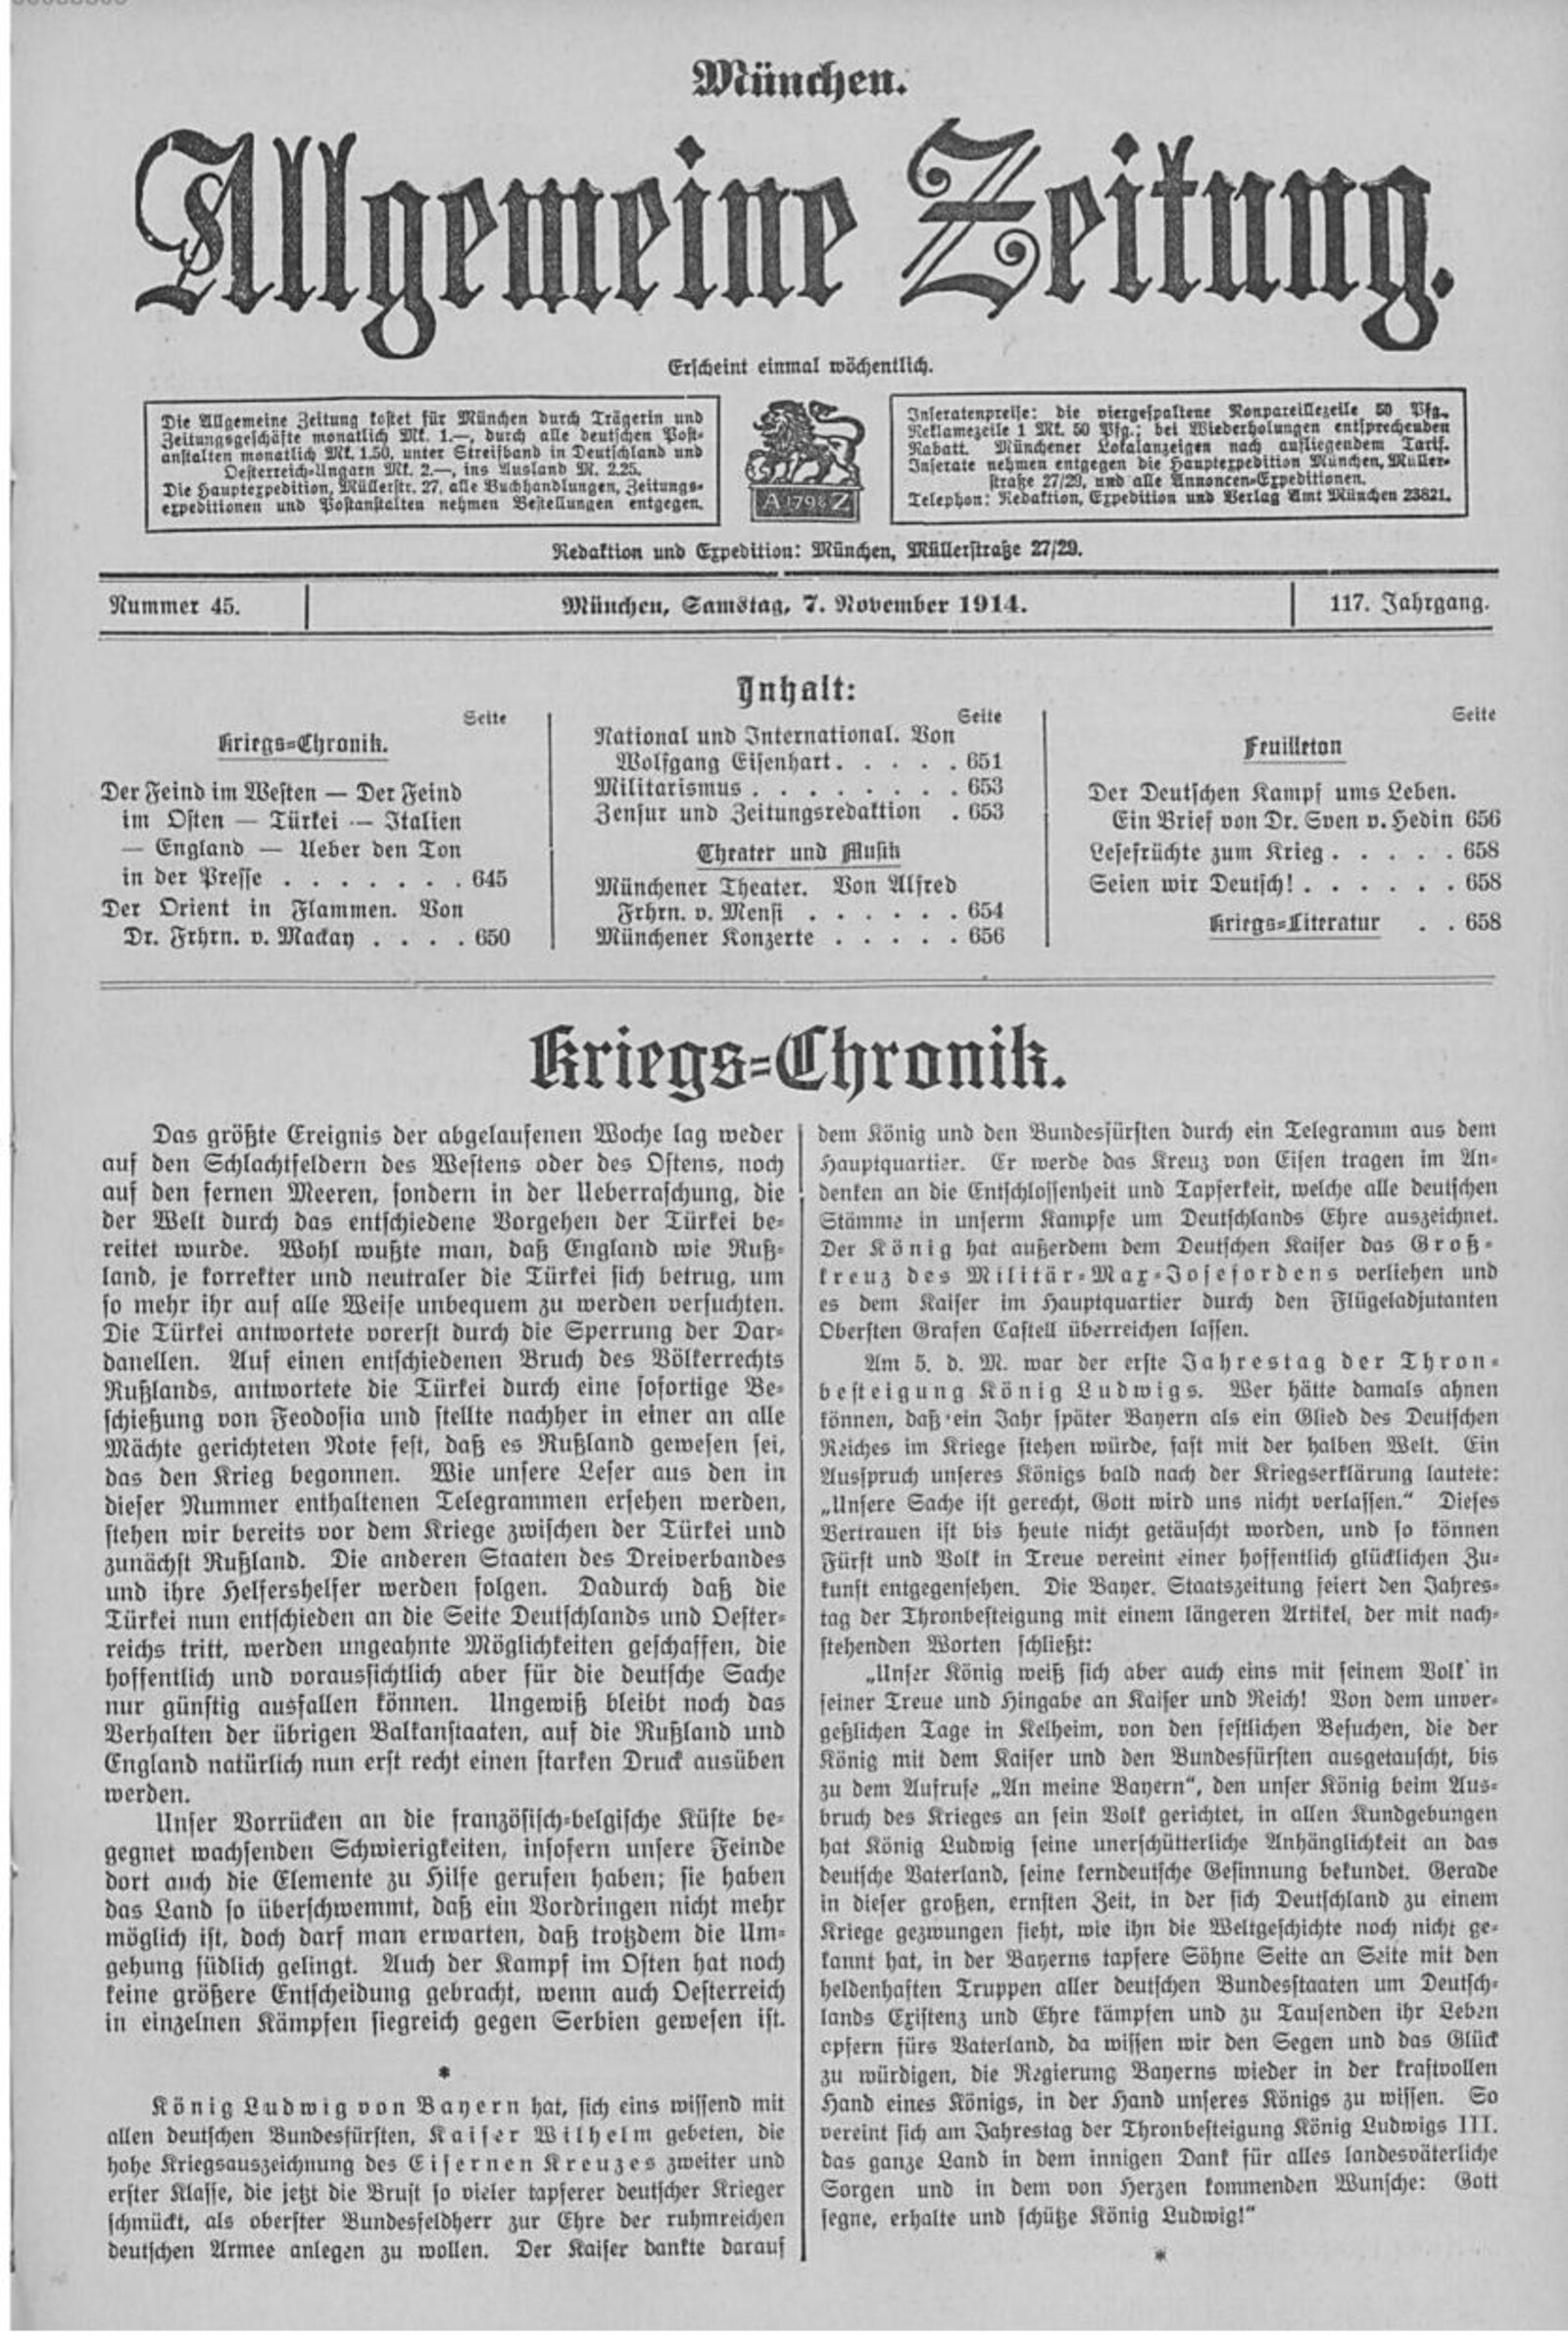

In [15]:
Image.open('image.jpg')

#### Now process PDFs

In [ ]:
pathpdf = '../../PDF'

In [ ]:
!ls ../../PDF

In [ ]:
samplepdf = 'SNP2719372X-19180122-0-0-0-0.pdf'

In [ ]:
converted_pdf = convert_from_path(os.path.join(pathpdf, samplepdf), 
                                  #transparent=True, grayscale = True, 
                                  use_cropbox=True)

In [ ]:
type(converted_pdf)

In [ ]:
len(converted_pdf)

In [ ]:
type(converted_pdf[1])

In [ ]:
sample_page = converted_pdf[1]

show page size

In [ ]:
sample_page.size

show page

In [ ]:
#sample_page.show()

In [ ]:
sample_page

In [ ]:
%%time
recognized = pytesseract.image_to_string(sample_page, lang='frk')

In [ ]:
print(recognized)

### Process all PDFs

In [ ]:
%%time
for filename in tqdm(os.listdir(pathpdf)):
    if '.pdf' in filename:
        thispath = os.path.join(pathpdf, filename)
        converted_pdf = convert_from_path(thispath, use_cropbox=True)
        with open(thispath.replace('.pdf', '.txt'), 'w') as output_txt:
            for image in converted_pdf:
                recognized = pytesseract.image_to_string(image, 
                                                         lang='frk')
                output_txt.write(recognized)
                                

### Process the remainder

In [22]:
processed_already = [
    'SNP2719372X-19180101-0-0-0-0.pdf', 
    'SNP2719372X-19180108-0-0-0-0.pdf', 
    'SNP2719372X-19180115-0-0-0-0.pdf', 
    'SNP2719372X-19180122-0-0-0-0.pdf', 
    'SNP2719372X-19180129-0-0-0-0.pdf', 
    'SNP2719372X-19180205-0-0-0-0.pdf', 
    'SNP2719372X-19180212-0-0-0-0.pdf', 
    'SNP2719372X-19180219-0-0-0-0.pdf', 
    'SNP2719372X-19180226-0-0-0-0.pdf', 
    'SNP2719372X-19180305-0-0-0-0.pdf', 
    'SNP2719372X-19180312-0-0-0-0.pdf', 
    'SNP2719372X-19180319-0-0-0-0.pdf', 
    'SNP2719372X-19180326-0-0-0-0.pdf', 
    'SNP2719372X-19180409-0-0-0-0.pdf', 
    'SNP2719372X-19180416-0-0-0-0.pdf', 
    'SNP2719372X-19180423-0-0-0-0.pdf', 
    'SNP2719372X-19180430-0-0-0-0.pdf', 
    'SNP2719372X-19180507-0-0-0-0.pdf', 
    'SNP2719372X-19180514-0-0-0-0.pdf', 
    'SNP2719372X-19180521-0-0-0-0.pdf', 
    'SNP2719372X-19180528-0-0-0-0.pdf', 
    'SNP2719372X-19180604-0-0-0-0.pdf', 
    'SNP2719372X-19180611-0-0-0-0.pdf', 
    'SNP2719372X-19180618-0-0-0-0.pdf',
    'SNP27112366-19180625-0-0-0-0.pdf', 
'SNP2719372X-19180806-0-0-0-0.pdf', 
'SNP2719372X-19181105-0-0-0-0.pdf', 
'SNP27112366-19180305-0-0-0-0.pdf', 
'SNP27112366-19180319-0-0-0-0.pdf', 
]

In [23]:
pathpdf = '../../../FS1/PDFall'

In [ ]:
for filename in tqdm(os.listdir(pathpdf)):
    if '.pdf' in filename and filename not in processed_already:
        print(filename)
        thispath = os.path.join(pathpdf, filename)
        converted_pdf = convert_from_path(thispath, use_cropbox=True)
        with open(thispath.replace('.pdf', '.txt'), 'w') as output_txt:
            for image in converted_pdf:
                recognized = pytesseract.image_to_string(image, 
                                                         lang='frk')
                output_txt.write(recognized)